<a href="https://colab.research.google.com/github/rafisalemma/Open-Bigdata/blob/main/ProyectoBigData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Big Data: Análisis de Sentimiento en Twitter

In [5]:
# Primeramente importamos librerias necesarias para el programa
import nltk
nltk.download('vader_lexicon')
!pip install langdetect
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from langdetect import detect
import string

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=ec7e576ba27af66c79bbe30a55930df050fc0a7d7085377957ffb625b58fe1e8
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


# **Primera parte: exploración de Datos (EDA)** --> aplicable para investigar los datos y resumir las ideas clave.

Se utiliza principalmente para ver qué datos podemos encontrar, más allá del modelado formal y brinda una mejor comprensión de las variables del conjunto de datos y las relaciones entre ellas.

In [6]:
# Para realizar el analisis exploratorio, cargamos el csv que fue descargado
# desde el Kaggle
from google.colab import files
uploaded = files.upload()

# Llamamos a los datos para analisis del contenido
df = pd.read_csv("twitter_training.csv", sep=',')
df.head(15)

Saving twitter_training.csv to twitter_training.csv


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...


# Implementamos funciones para observar el dataset

In [7]:
# Proporciona una vision general de los componentes del conjunto de datos,
# sirve para conocer la informacion del dataset
df.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [10]:
# Para poder vsualizar de manera mas ordenada
df.columns = ['t_id','t_place','t_type','t_text']

# Visualizacion de cambios
print(df.columns)

Index(['t_id', 't_place', 't_type', 't_text'], dtype='object')


In [11]:
# Descripcion del dataset de manera mas estructurada, se puede ver la
# cantidad de valores nulos, tipos de datos y uso de memoria como se muestra en
# los resultados anteriores junto con estadísticas descriptivas.
df.describe()

,t_id
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [12]:
# Mostrará el número de valores duplicados si están presentes en los datos
df.duplicated().sum()

# Eliminar duplicados en caso de encontrar
df_sin_duplicados = df.drop_duplicates()
df_sin_duplicados.duplicated().sum()

# Encontrar los valores nulos garantiza la calidad de los datos
df.isnull().sum()

# Reemplazar los valores nulos encontrados
df.replace(np.nan,'0',inplace = True)

# Visualizar los cambios
df.isnull().sum()

t_id       0
t_place    0
t_type     0
t_text     0
dtype: int64

# Funciones para entender los tipos de datos que componen el dataset

In [13]:
# Nos muestra los tipos de datos del conjunto
df.dtypes

t_id        int64
t_place    object
t_type     object
t_text     object
dtype: object

# Diagrama de Caja

Herramienta gráfica para visualizar la distribución de un conjunto de datos y resumir sus propiedades estadísticas básicas.

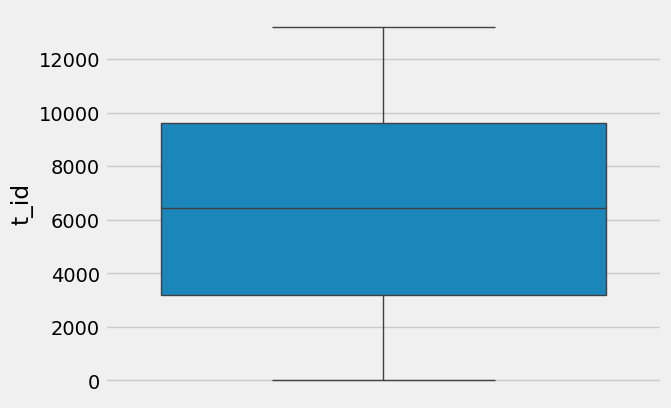

In [15]:
# La columna t_id es elegida paraa yudar a detectar anomalías y patrones
# inusuales en la generación de identificadores.

# Funcion para crear el diagrama, indicando los datos a utilizar
sns.boxplot( y=df["t_id"] );
plt.show()

Conclusion del grafico:
1. La caja azul representa el rango, donde se encuentra aproximadamente el 50% medio de los valores de t_id.
2. La línea horizontal dentro de la caja indica la mediana de los valores de t_id.
3. Las líneas verticales se extienden desde la caja hasta los valores máximos y mínimos dentro de el rango. No se ven puntos individuales, lo que indicaría valores atípicos.

# Preprocesamiento de datos

Se refiere a las transformaciones aplicadas a nuestros datos antes de alimentarlos al algoritmo. El preprocesamiento de datos es una técnica que se utiliza para convertir los datos sin procesar en un conjunto de datos limpio.

El primer paso consiste en la limpieza de los datos:

In [17]:
import re

# Funcion para la limpieza de los tweets
# Elimina todos los caracteres especiales y numeroicos, dejando los alfabeticos
def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

# Limpieza del texto en la columna "review" del DataFrame mydata y guarda el
# resultado en una nueva columna llamada "Cleaned Reviews".
df['t_limpio'] = df['t_text'].apply(clean)
df.head()

,t_id,t_place,t_type,t_text,t_limpio
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder yo...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...


In [19]:
import re
def limpiar_tweet(text):
    tweet = re.sub(r'http\S+', '',text )  # Eliminar URLs
    tweet = re.sub(r'@\w+', '', text)     # Eliminar menciones
    tweet = re.sub(r'#', '', text)        # Eliminar hashtag symbol
    tweet = re.sub(r'[^\w\s]', '', text)  # Eliminar puntuación
    tweet = text.lower()                  # Convertir a minúsculas
    return tweet

Extracción de Características:

Una vez que tenemos los datos "limpios", pasamos a la extraccion de características relevantes del texto, como palabras clave, emoticones y hashtags para el analisis de sentimiento

In [21]:
# Extraccion de hashtags
def extraer_hashtags(t_limpio):
    return re.findall(r'#(\w+)', t_limpio)

# Extraccion de emojis
def extraer_emoticones(t_limpio):
    emoticones = [':)', ':(', ';)', 'XD', '<3']
    encontrados = [emoticon for emoticon in emoticones if emoticon in t_limpio]
    return encontrados

# Aplicar las funciones y crear nuevas columnas
df['hashtags'] = df['t_limpio'].apply(extraer_hashtags)
df['emoticones'] = df['t_limpio'].apply(extraer_emoticones) # Fixed typo here

# Imprimir los resultados
print(df[['hashtags','emoticones' ]])

      hashtags emoticones
0           []         []
1           []         []
2           []         []
3           []         []
4           []         []
...        ...        ...
74676       []         []
74677       []         []
74678       []         []
74679       []         []
74680       []         []

[74681 rows x 2 columns]


# Analisis de sentimiento

 Identificar y categorizar de forma computacional las opiniones expresadas en un fragmento de texto, especialmente para determinar si la actitud del escritor hacia un tema, producto, etc. en particular es positiva, negativa o neutral

In [27]:
#Revisar la estructura del DataFrame, para ver los nombres de todas las columnas
print(df.head())

   t_id      t_place    t_type  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                              t_text  \
0  I am coming to the borders and I will kill you...   
1  im getting on borderlands and i will kill you ...   
2  im coming on borderlands and i will murder you...   
3  im getting on borderlands 2 and i will murder ...   
4  im getting into borderlands and i can murder y...   

                                            t_limpio hashtags emoticones  
0  I am coming to the borders and I will kill you...       []         []  
1  im getting on borderlands and i will kill you ...       []         []  
2  im coming on borderlands and i will murder you...       []         []  
3  im getting on borderlands and i will murder yo...       []         []  
4  im getting into borderlands and i can murder y...       []         []  


In [96]:
# Funcion para calcular los %
def percentage(part, whole):
  return 100 * float(part)/float(whole)

# Funcion para inicializar contadores y listas
positivo = 0
negativo = 0
neutral = 0
polaridad = 0
tweet_list = []
positivo_list =[]
negativo_list =[]
neutral_list = []

# Analisis de sentimiento de cada tweet
for tweet in df['t_limpio']:
    tweet_list.append(tweet)
    analisis = TextBlob(tweet)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polaridad += analisis.sentiment.polarity

    if neg > pos:
      negativo_list.append(tweet)
      negativo += 1

    if pos > neg:
      positivo_list.append(tweet)
      positivo += 1

    if pos == neg:
      neutral_list.append(tweet)
      neutral += 1



In [97]:
# Calcular porcentajes de polaridad de cada tweet
total_tweets = len(df)
positivo = percentage(positivo, total_tweets)
negativo = percentage(negativo, total_tweets)
neutral = percentage(neutral,  total_tweets)
polaridad = percentage(polaridad,  total_tweets)

positivo = format(positivo, '.1f')
negativo = format(negativo, '.1f')
neutral = format(neutral, '.1f')

In [98]:
# Impresion de resultados
print(f'Positivo: {positivo}%')
print(f'Negativo: {negativo}%')
print(f'Neutral: {neutral}%')
print(f'Polaridad: {polaridad}')

Positivo: 47.0%
Negativo: 36.6%
Neutral: 16.4%
Polaridad: 7.096256573396712


In [99]:
# Convertir todo a dataframe para estructurar los datos de una manera
# que sea más fácil de manejar y analizar
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
positivo_list = pd.DataFrame(positivo_list)
negativo_list = pd.DataFrame(negativo_list)

In [100]:
#mirar que hay dentro
print('cant tweets: ', len(tweet_list))
print('cant positivos: ', len(positivo_list))
print('cant negativos: ', len(negativo_list))
print('cant neutrales: ', len(neutral_list))

cant tweets:  74681
cant positivos:  35102
cant negativos:  27366
cant neutrales:  12213


In [101]:
tweet_list.head()

,0
0,I am coming to the borders and I will kill you...
1,im getting on borderlands and i will kill you ...
2,im coming on borderlands and i will murder you...
3,im getting on borderlands and i will murder yo...
4,im getting into borderlands and i can murder y...


In [113]:
# Create a new column 't_limpio' and populate it with the tweet text from each row
tweet_list["t_limpio"] = tweet_list.apply(lambda row: row[0], axis=1)

In [116]:
# Crear nuevo DataFrame y más características
tweet_list["t_text"] = tweet_list['t_limpio']

# Eliminar 'RT', puntuación, etc.
remove_rt = lambda x: re.sub('RT @\w+: '," ", x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", x)
tweet_list["t_text"] = tweet_list["t_text"].map(remove_rt).map(rt)
tweet_list["t_text"] = tweet_list["t_text"].str.lower()
tweet_list.head(10)


,0,t_limpio,t_text
0,I am coming to the borders and I will kill you...,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
1,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
2,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
3,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
4,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...
5,So I spent a few hours making something for fu...,So I spent a few hours making something for fu...,so i spent a few hours making something for fu...
6,So I spent a couple of hours doing something f...,So I spent a couple of hours doing something f...,so i spent a couple of hours doing something f...
7,So I spent a few hours doing something for fun...,So I spent a few hours doing something for fun...,so i spent a few hours doing something for fun...
8,So I spent a few hours making something for fu...,So I spent a few hours making something for fu...,so i spent a few hours making something for fu...
9,So I spent a few hours making something for f...,So I spent a few hours making something for f...,so i spent a few hours making something for f...


In [117]:
# Calculando los valores de Negativo, Positivo, Neutral y Compuesto
# Aplicar el análisis de sentimiento de TextBlob y almacenar los resultados en variables temporales
sentiment_results = tweet_list['t_text'].apply(lambda Text: TextBlob(Text).sentiment)

# Asignar polaridad y subjetividad a columnas separadas
tweet_list['polarity'] = sentiment_results.apply(lambda x: x.polarity)
tweet_list['subjectivity'] = sentiment_results.apply(lambda x: x.subjectivity)

# Iterar sobre el DataFrame y calcular el análisis de sentimiento con NLTK
for index, row in tweet_list.iterrows():
    score = SentimentIntensityAnalyzer().polarity_scores(row['t_text'])
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tweet_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tweet_list.loc[index, 'sentiment'] = "positive"
    else:
        tweet_list.loc[index, 'sentiment'] = "neutral"
    tweet_list.loc[index, 'neg'] = neg
    tweet_list.loc[index, 'neu'] = neu
    tweet_list.loc[index, 'pos'] = pos
    tweet_list.loc[index, 'compound'] = comp

# Imprimir los resultados
print(tweet_list)

                                                       0  \
0      I am coming to the borders and I will kill you...   
1      im getting on borderlands and i will kill you ...   
2      im coming on borderlands and i will murder you...   
3      im getting on borderlands and i will murder yo...   
4      im getting into borderlands and i can murder y...   
...                                                  ...   
74676  Just realized that the Windows partition of my...   
74677  Just realized that my Mac window partition is ...   
74678  Just realized the windows partition of my Mac ...   
74679  Just realized between the windows partition of...   
74680  Just like the windows partition of my Mac is l...   

                                                t_limpio  \
0      I am coming to the borders and I will kill you...   
1      im getting on borderlands and i will kill you ...   
2      im coming on borderlands and i will murder you...   
3      im getting on borderlands and i 

In [118]:
#crear nuevos dataframes para cada sentimiento
tweet_list_negative = tweet_list[tweet_list["sentiment"]=="negative"]
tweet_list_positive = tweet_list[tweet_list["sentiment"]=="positive"]
tweet_list_neutral = tweet_list[tweet_list["sentiment"]=="neutral"]

In [119]:
#funcion para contar valores por cada columna
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [120]:
#Count_values for sentiment
count_values_in_column(tweet_list,"sentiment")

,Total,Percentage
sentiment,,
positive,32760,48.71
negative,25664,38.16
neutral,8828,13.13


Word Cloud Saved Successfully


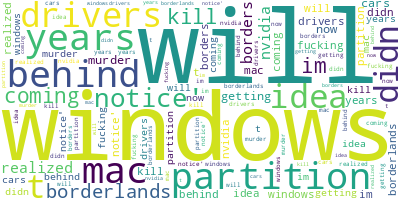

In [133]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from IPython.display import display

# Función para crear la nube de palabras
def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(
        background_color="white",
        max_words=3000,
        stopwords=stopwords,
        repeat=True
    )

    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")

    path = "wc.png"
    display(Image.open(path))

# Llamar a la función para crear la nube de palabras
create_wordcloud(tweet_list["t_text"].values)


# Entrenamiento del modelo

ML es un enfoque basado en datos y nuestro modelo de ML producirá resultados tan buenos o tan malos como los datos que le proporcionamos.

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import seaborn as sns

# Vectorizar el texto
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(tweet_list['t_text'])
y = tweet_list['sentiment']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo
model = MultinomialNB()

# Entrenar el modelo
model.fit(X_train, y_train)


MultinomialNB()

Evaluacion del modelo

In [129]:
# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el rendimiento
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

print(f'Precisión: {accuracy}')
print(f'Exactitud: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1_score}')


Precisión: 0.7726563080811836
Exactitud: 0.7887916772699655
Recall: 0.7726563080811836
F1-score: 0.7425035435386071


Visualizamos la distribución de los sentimientos y comparamos los resultados.





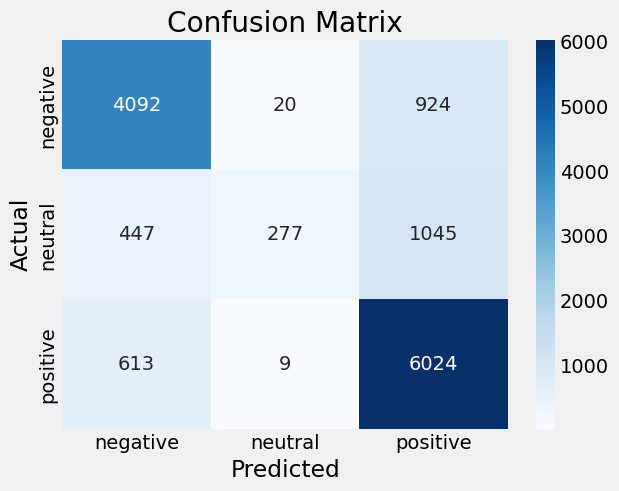

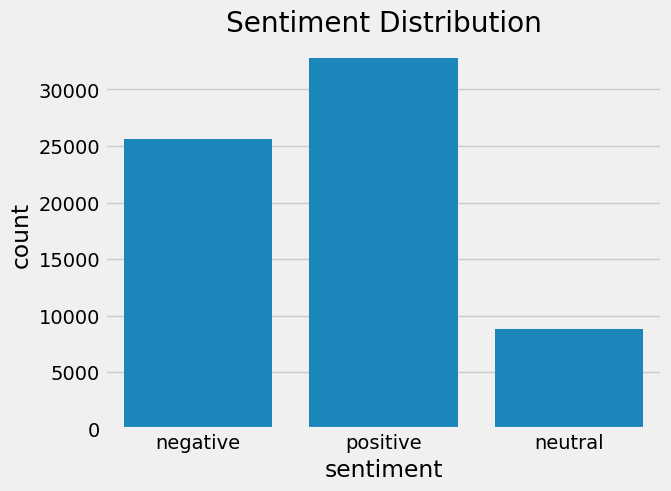

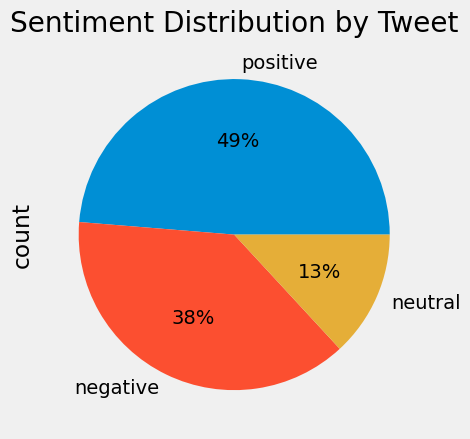

In [130]:
# Matriz de confusión
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Distribución de los sentimientos
sns.countplot(data=tweet_list, x='sentiment')
plt.title('Sentiment Distribution')
plt.show()

# Distribución de sentimientos por tweet
tweet_list['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Sentiment Distribution by Tweet')
plt.show()

Conclusiones a partir de los resultados:

Imagen 1 (Distribución de sentimiento por tweet):
El 49% de los tweets tienen un sentimiento positivo.
El 38% de los tweets tienen un sentimiento negativo.
El 13% de los tweets tienen un sentimiento neutral.

Imagen 2 (Distribución de sentimientos):
La mayoría de los tweets tienen un sentimiento positivo, con un recuento de aproximadamente 27,000.
El segundo sentimiento más común es el negativo, con un recuento de alrededor de 21,000.
El sentimiento neutral tiene el recuento más bajo, alrededor de 4,000.

Imagen 3 (Matriz de confusión):
El modelo parece tener un buen desempeño en la clasificación de tweets negativos, con 4,092 predicciones correctas y 447 tweets negativos clasificados erróneamente como neutrales.
El modelo tiene dificultades para clasificar tweets neutrales, con solo 277 predicciones correctas y 924 tweets neutrales clasificados erróneamente como negativos y 1,045 como positivos.
El modelo también tiene un buen desempeño en la clasificación de tweets positivos, con 6,024 predicciones correctas, pero 613 tweets positivos clasificados erróneamente como negativos.

En general, los datos muestran una distribución desigual de sentimientos, con una mayoría de tweets positivos, seguidos por negativos y una pequeña porción de neutrales. El modelo tiene  dificultades para clasificar correctamente los tweets neutrales, pero tiene un buen desempeño en la clasificación de tweets positivos y negativos.